In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [214]:
cols = ['age', 'op_year', 'lymph_detect', 'class']
data1 = pd.read_csv("data_train.csv")
data1.columns = cols
for col in cols:
    data1[col] = data1[col].astype(float)


In [215]:
data1.head()

,age,op_year,lymph_detect,class
0,38.0,66.0,11.0,1.0
1,38.0,60.0,1.0,1.0
2,38.0,67.0,5.0,1.0
3,39.0,66.0,0.0,2.0
4,39.0,63.0,0.0,1.0


In [216]:
data1['class'].value_counts()

1.0    172
2.0     72
Name: class, dtype: int64

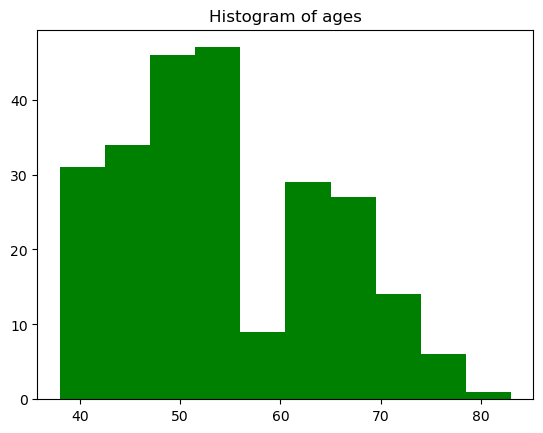

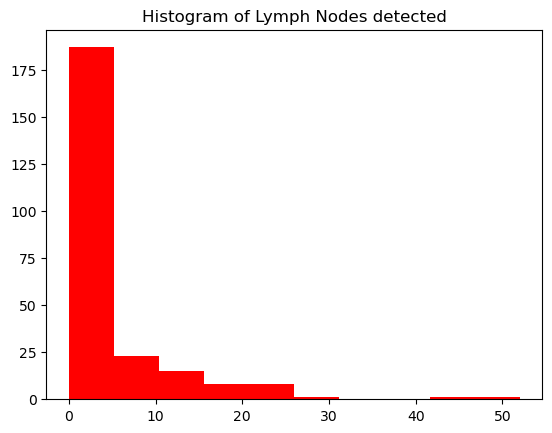

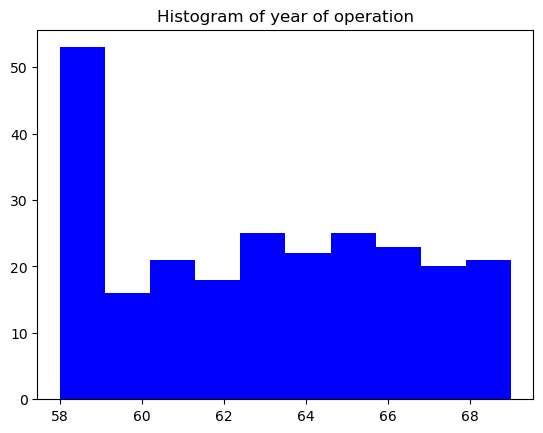

In [217]:
plt.hist(data1.age, color="green")
plt.title('Histogram of ages')
plt.show()

plt.hist(data1.lymph_detect, color="red")
plt.title('Histogram of Lymph Nodes detected')
plt.show()

plt.hist(data1.op_year, color="blue")
plt.title('Histogram of year of operation')
plt.show()

In [218]:
class1_data = data1[(data1['class'] ==1)]
class2_data = data1[(data1['class'] ==2)]


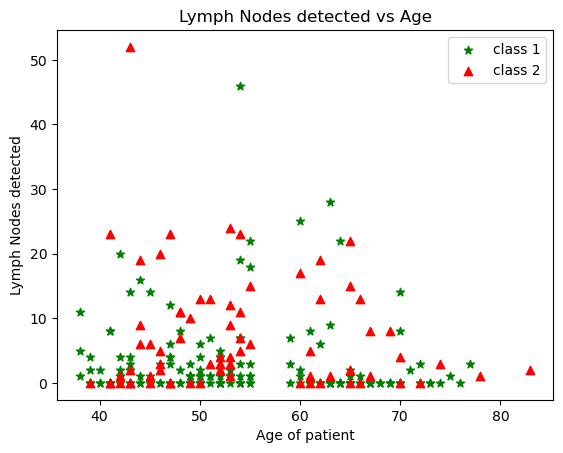

In [219]:
plt.scatter(class1_data.age,class1_data.lymph_detect, marker = '*', color = 'green', label="class 1")
plt.scatter(class2_data.age,class2_data.lymph_detect, marker = '^', color = 'red', label="class 2")
plt.title('Lymph Nodes detected vs Age')
plt.xlabel('Age of patient')
plt.ylabel('Lymph Nodes detected')
plt.legend(loc="upper right")
plt.show()

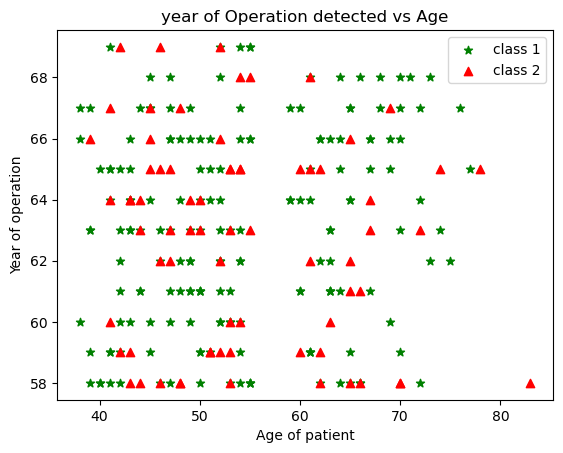

In [220]:
plt.scatter(class1_data.age,class1_data.op_year, marker = '*', color = 'green', label="class 1")
plt.scatter(class2_data.age,class2_data.op_year, marker = '^', color = 'red', label="class 2")
plt.title('year of Operation detected vs Age')
plt.xlabel('Age of patient')
plt.ylabel('Year of operation')
plt.legend(loc="upper right")
plt.show()

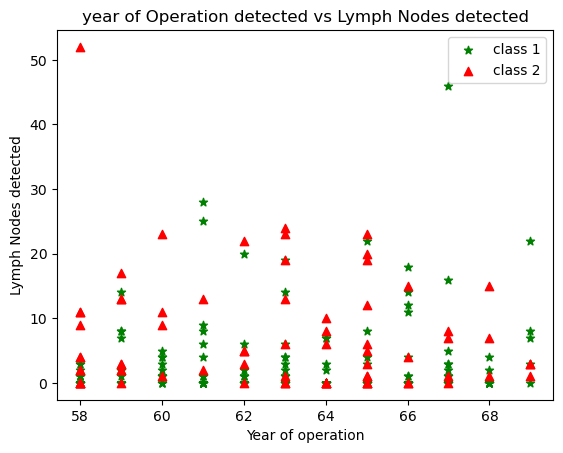

In [9]:
plt.scatter(class1_data.op_year,class1_data.lymph_detect, marker = '*', color = 'green', label="class 1")
plt.scatter(class2_data.op_year,class2_data.lymph_detect, marker = '^', color = 'red', label="class 2")
plt.title('year of Operation detected vs Lymph Nodes detected')
plt.ylabel('Lymph Nodes detected')
plt.xlabel('Year of operation')
plt.legend(loc="upper right")
plt.show()

In [221]:
import math
from collections import Counter

#Normalize the data points
def normalize(X_train):
    for column in X_train.columns:
        X_train[column] = (X_train[column] - X_train[column].min()) / (X_train[column].max() - X_train[column].min())
    return X_train  


def knn_Classifier(X_train, X_test, Y_train, k, p):
    Y_predicted = []
    for index, row in X_test.iterrows():
        #find the distance. Here P differentiates between L2 and L1 norm
        euclid_dist = []
        euclid_dist.append(((abs([row['age'], row['op_year'], row['lymph_detect']] - X_train)**p).sum(axis=1))**(1/p))
        df_dists = pd.DataFrame(euclid_dist).transpose()
        df_dists.set_index(Y_train.index)
        df_dists.columns = ['dist']
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        # Find the most common class around the test point
        counts = Counter(Y_train.iloc[df_nn.index])
        prediction = counts.most_common()[0][0]
        #Append the Prediction vector with the predicted class
        Y_predicted.append(prediction)
    return Y_predicted

In [222]:
cols = ['age', 'op_year', 'lymph_detect', 'class']
data_test = pd.read_csv("data_test.csv")
data_test.columns = cols
for col in cols:
    data_test[col] = data_test[col].astype(float)

In [258]:
cols = ['age', 'op_year', 'lymph_detect', 'class']
data_dev = pd.read_csv("data_dev.csv")
data_dev.columns = cols
for col in cols:
    data_dev[col] = data_dev[col].astype(float)

In [259]:
Y_train = data1['class']
Y_test = data_dev['class']
X_train = normalize(data1.loc[:, data1.columns != "class"])
X_test = normalize(data_dev.loc[:, data_test.columns != "class"])

C:\Users\abhis\.conda\envs\gputensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


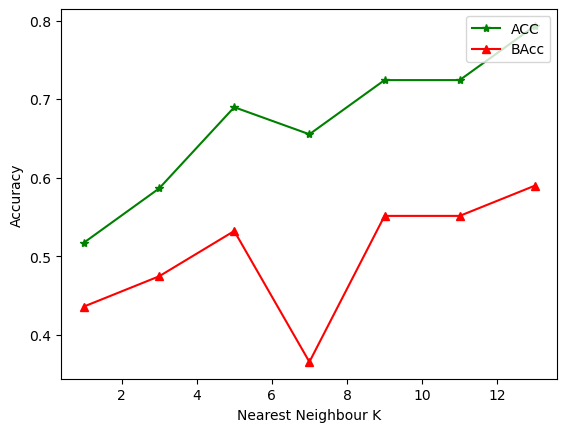

In [261]:
def explore_KNN():
    total_sample = len(X_test)
    acc = []
    Bacc = []
    for i in range(1,15,2):
        Y_pred = knn_Classifier(X_train, X_test, Y_train, i, 2)
        myPrediction = Counter(Y_pred)
        answers = Counter(Y_test)
        pf = pd.DataFrame(Y_pred)
        lm = pf[Y_test==1].subtract(Y_test[Y_test==1], axis=0).abs().sum()
        lp = pf[Y_test==2].subtract(Y_test[Y_test==2], axis=0).abs().sum()
        class1_correct = 0.5*(abs(answers[1] - lm)/answers[1])
        class2_correct = 0.5*(abs(answers[2] - lp)/answers[2])
        wrong_predict = (Y_test - Y_pred).abs().sum()
        acc.append((total_sample-wrong_predict)/total_sample)
        Bacc.append(class1_correct+class2_correct)
#     print(acc)
    plt.plot(range(1,15,2), acc, label = 'ACC', marker = '*', color = 'green')
    plt.plot(range(1,15,2), Bacc, label = 'BAcc', marker = '^', color = 'red')
    plt.xlabel('Nearest Neighbour K')
    plt.ylabel('Accuracy')
    plt.legend(loc="upper right")
    plt.show()

explore_KNN()

In [280]:
acc = []
Bacc = []
Y_train = data1['class']
Y_test = data_test['class']
X_train = normalize(data1.loc[:, data1.columns != "class"])
X_test = normalize(data_test.loc[:, data_test.columns != "class"])
Y_pred = knn_Classifier(X_train, X_test, Y_train, 3, 1)
myPrediction = Counter(Y_pred)
answers = Counter(Y_test)
pf = pd.DataFrame(Y_pred)
lm = pf[Y_test==1].subtract(Y_test[Y_test==1], axis=0).abs().sum()
lp = pf[Y_test==2].subtract(Y_test[Y_test==2], axis=0).abs().sum()
class1_correct = 0.5*(abs(answers[1] - lm)/answers[1])
class2_correct = 0.5*(abs(answers[2] - lp)/answers[2])
wrong_predict = (Y_test - Y_pred).abs().sum()
acc.append((total_sample-wrong_predict)/total_sample)
Bacc.append(class1_correct+class2_correct)
acc

C:\Users\abhis\.conda\envs\gputensorflow\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


[0.6551724137931034]

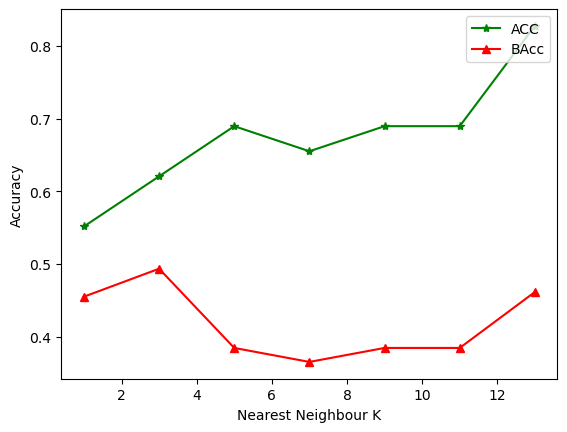

In [262]:
def explore_KNN():
    total_sample = len(X_test)
    acc = []
    Bacc = []
    for i in range(1,15,2):
        Y_pred = knn_Classifier(X_train, X_test, Y_train, i, 1)
        myPrediction = Counter(Y_pred)
        answers = Counter(Y_test)
        pf = pd.DataFrame(Y_pred)
        lm = pf[Y_test==1].subtract(Y_test[Y_test==1], axis=0).abs().sum()
        lp = pf[Y_test==2].subtract(Y_test[Y_test==2], axis=0).abs().sum()
        class1_correct = 0.5*(abs(answers[1] - lm)/answers[1])
        class2_correct = 0.5*(abs(answers[2] - lp)/answers[2])
        wrong_predict = (Y_test - Y_pred).abs().sum()
        acc.append((total_sample-wrong_predict)/total_sample)
        Bacc.append(class1_correct+class2_correct)
#     print(acc)
    plt.plot(range(1,15,2), acc, label = 'ACC', marker = '*', color = 'green')
    plt.plot(range(1,15,2), Bacc, label = 'BAcc', marker = '^', color = 'red')
    plt.xlabel('Nearest Neighbour K')
    plt.ylabel('Accuracy')
    plt.legend(loc="upper right")
    plt.show()

explore_KNN()

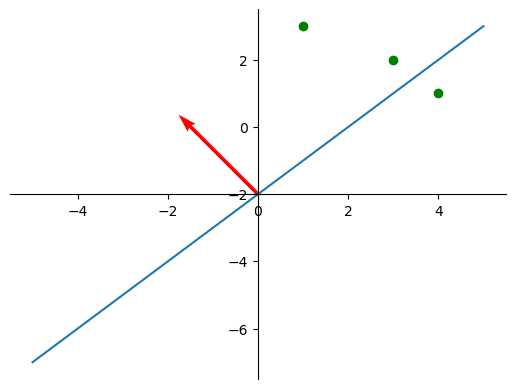

In [145]:
ptx = [1,3,4]
pty = [3,2,1]
x = np.linspace(-5,5,100)
y = x-2
X=[0]
Y =[-2]
U=[-2]
V = [2]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(x,y)
plt.scatter(ptx,pty,color='green')
plt.quiver(X,Y,U,V, color='r', units='xy', scale=1)
plt.show()

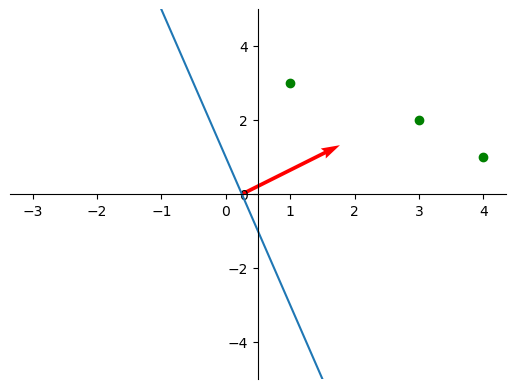

In [173]:
ptx = [1,3,4]
pty = [3,2,1]
x = np.linspace(-3,3,100)
y = 1-4*x
X=[0.25]
Y =[0]
U=[2]
V = [1]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(-5, 5)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(x,y)
plt.scatter(ptx,pty,color='green')
plt.quiver(X,Y,U,V, color='r', units='xy', scale=1)
plt.show()

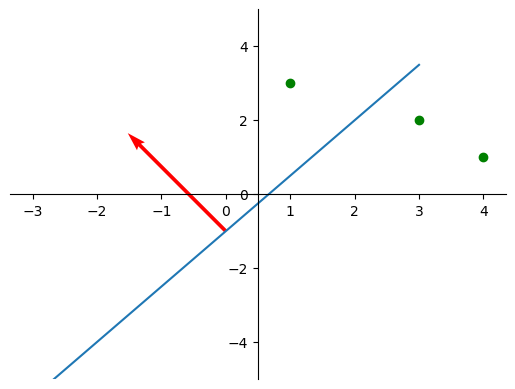

In [171]:
ptx = [1,3,4]
pty = [3,2,1]
x = np.linspace(-3,3,100)
y = 3*x/2-1
X=[0]
Y =[-1]
U=[-2]
V = [2]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(-5, 5)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(x,y)
plt.scatter(ptx,pty,color='green')
plt.quiver(X,Y,U,V, color='r', units='xy', scale=1)
plt.show()